In [1]:
import pandas as pd

In [2]:
benin_data = pd.read_csv('data/benin_clean.csv')

In [3]:
sierra_leone = pd.read_csv('data/sierraleone-bumbuna_clean.csv')

In [4]:
togo = pd.read_csv('data/togo-dapaong_qc_clean.csv')

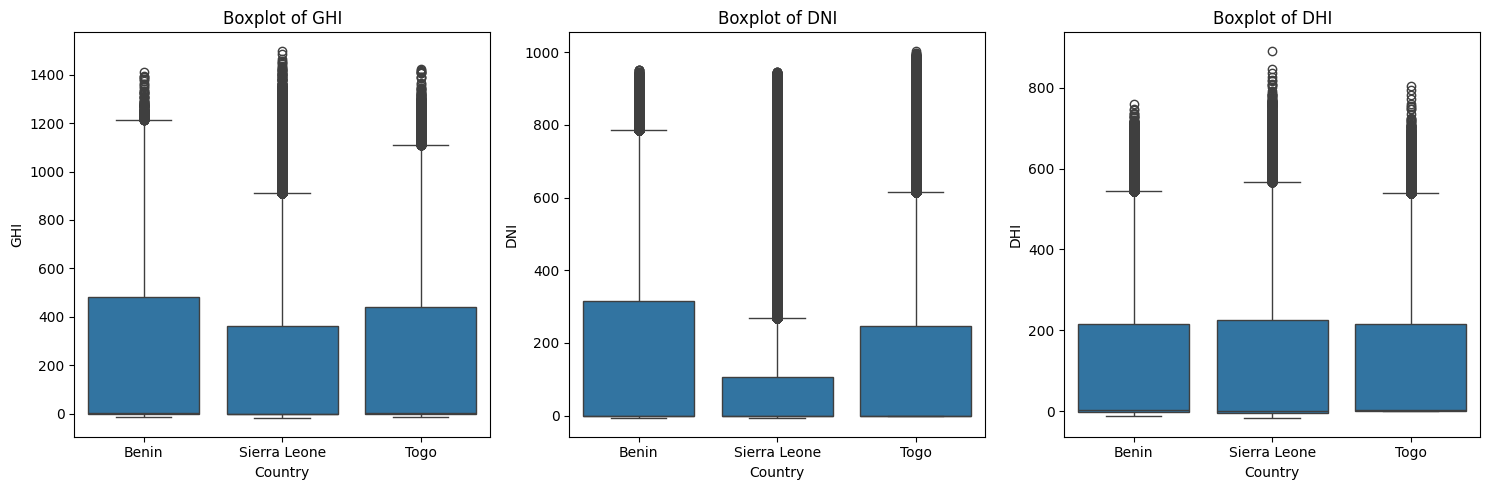

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

benin_data['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

combined_data = pd.concat([benin_data, sierra_leone, togo])

# Boxplots of GHI, DNI, DHI
metrics = ['GHI', 'DNI', 'DHI']
plt.figure(figsize=(15, 5))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Country', y=metric, data=combined_data)
    plt.title(f'Boxplot of {metric}')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()

In [7]:
summary_stats = combined_data.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]
summary_stats

,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
Country,,,,,,,,,
Benin,240.559452,1.8,331.131327,167.187516,-0.1,261.710501,115.358961,1.6,158.691074
Sierra Leone,201.957515,0.3,298.495150,116.376337,-0.1,218.652659,113.720571,-0.1,158.946032
Togo,230.555040,2.1,322.532347,151.258469,0.0,250.956962,116.444352,2.5,156.520714


In [9]:
from scipy.stats import f_oneway

# Prepare data for ANOVA
benin_ghi = benin_data['GHI']
sierra_leone_ghi = sierra_leone['GHI']
togo_ghi = togo['GHI']

# Run ANOVA
f_statistic, p_value = f_oneway(benin_ghi, sierra_leone_ghi, togo_ghi)
p_value

np.float64(0.0)

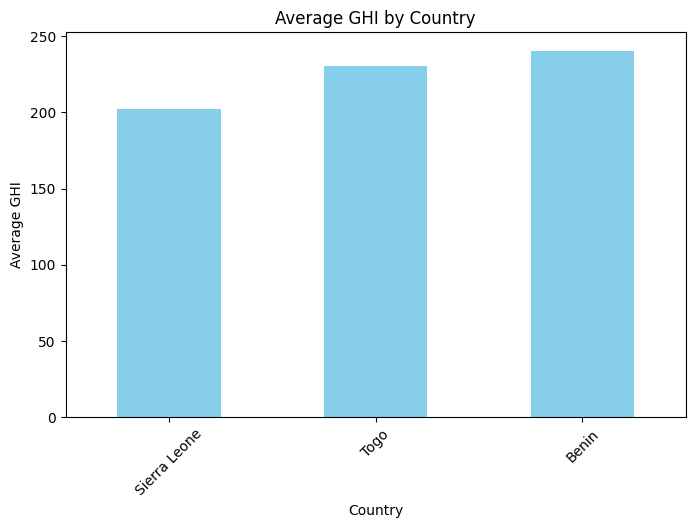

In [10]:
avg_ghi = combined_data.groupby('Country')['GHI'].mean().sort_values()

plt.figure(figsize=(8, 5))
avg_ghi.plot(kind='bar', color='skyblue')
plt.title('Average GHI by Country')
plt.ylabel('Average GHI')
plt.xticks(rotation=45)
plt.show()